In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [2]:
dir_projeto = Path(os.getcwd()).parent.absolute().parent.absolute()

In [24]:
def plot_probability_map(df_ocorrencias: pd.DataFrame, df_resultados: pd.DataFrame, mineral: str) -> None:
    """Plota mapa de probabilidades de mineral e amostras

    Args:
        df (pd.DataFrame): _description_
        mineral (str): _description_
    """
    plt.figure(figsize=(10, 6))

    sc = plt.scatter(
        df_resultados["longitude"],
        df_resultados["latitude"],
        c=df_resultados["probability"],
        cmap="viridis",
        s=3,
        edgecolor="k",
        alpha=0.8,
    )

    plt.colorbar(sc, label="Probabilidade")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Mapa de Probabilidade - {mineral}")

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xlim(df_resultados["longitude"].min() - 1, df_resultados["longitude"].max() + 1)
    plt.ylim(df_resultados["latitude"].min() - 0.5, df_resultados["latitude"].max() + 0.5)

    grid_x, grid_y = np.mgrid[
        df_resultados["longitude"].min() : df_resultados["longitude"].max() : 100j,
        df_resultados["latitude"].min() : df_resultados["latitude"].max() : 100j,
    ]
    grid_z = griddata(
        (df_resultados["longitude"], df_resultados["latitude"]), df_resultados["probability"], (grid_x, grid_y), method="cubic"
    )

    plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap="viridis", alpha=0.6)
    plt.scatter(df_ocorrencias["longitude"], df_ocorrencias["latitude"], c='k', marker='x', s=30, label="Ocorrências")
    plt.scatter(df_resultados["longitude"], df_resultados["latitude"], c="red", s=5, label="Amostras", alpha=0.5)
    plt.legend()

    plt.show()

In [14]:
df_ocorrencias_ouro = pd.read_csv(
    Path(dir_projeto, "Entrada", "ocorrencias_ouro.csv"),
    sep=";",
    dtype={"longitude": np.float32, "latitude": np.float32, "ocorrencia": np.int16},
)

df_resultados_ouro = pd.read_csv(
    Path(dir_projeto, "Entrada", "resultados_ouro.csv"),
    sep=";",
    dtype={
        "FatorF": np.float32,
        "Kd": np.float32,
        "Ud": np.float32,
        "grav_residual190km_ght": np.float32,
        "grav_residual100km": np.float32,
        "mag_asvi": np.float32,
        "mag_gt": np.float32,
        "probability": np.float32,
        "prediction": np.int16,
        "longitude": np.float32,
        "latitude": np.float32,
    },
)



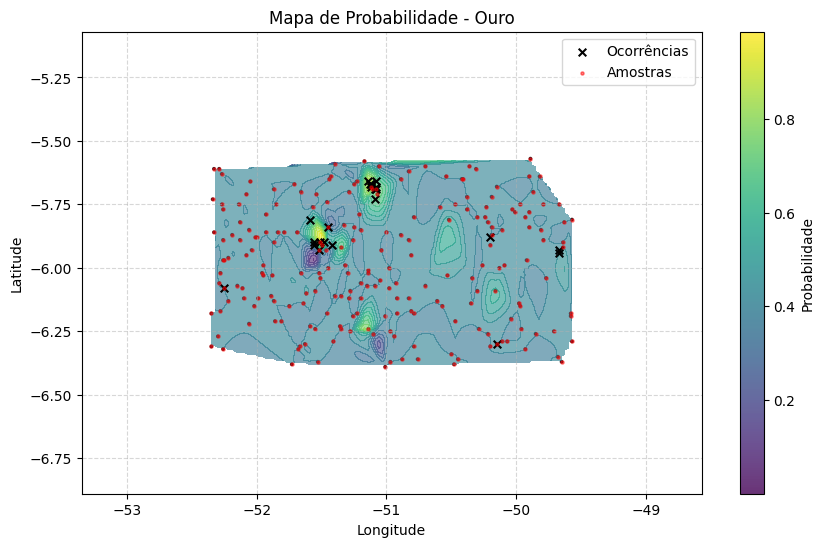

In [25]:
plot_probability_map(df_ocorrencias_ouro, df_resultados_ouro, "Ouro")

In [26]:
df_ocorrencias_cobre = pd.read_csv(
    Path(dir_projeto, "Entrada", "ocorrencias_cobre.csv"),
    sep=";",
    dtype={"longitude": np.float32, "latitude": np.float32, "ocorrencia": np.int16},
)

df_resultados_cobre = pd.read_csv(
    Path(dir_projeto, "Entrada", "resultados_cobre.csv"),
    sep=";",
    dtype={
        "FatorF": np.float32,
        "Kd": np.float32,
        "Ud": np.float32,
        "grav_residual190km_ght": np.float32,
        "grav_residual100km": np.float32,
        "mag_asvi": np.float32,
        "mag_gt": np.float32,
        "probability": np.float32,
        "prediction": np.int16,
        "longitude": np.float32,
        "latitude": np.float32,
    },
)

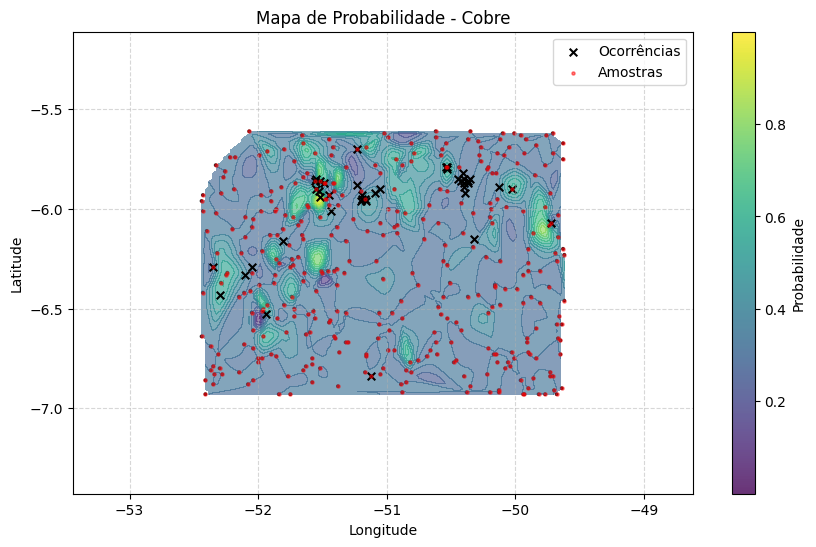

In [27]:
plot_probability_map(df_ocorrencias_cobre, df_resultados_cobre, 'Cobre')